In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
X = np.load('initial_inputs.npy')
Y = np.load('initial_outputs.npy')


In [3]:
# Week 1
X = np.append(X, np.array([[0.0, 0.999999]]), axis=0)
Y = np.append(Y, 0.0)

In [4]:
# Week 2
X = np.append(X, np.array([[0.999999, 0.000000]]), axis=0)
Y = np.append(Y, 0.0)

In [5]:
# Week 3, submission for M15
X = np.append(X, np.array([[0.676768, 0.000000]]), axis=0)
Y = np.append(Y, 5.56E-170)

In [6]:
print('X : ',  X)
print('Y : ', Y)

X :  [[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]
 [0.         0.999999  ]
 [0.999999   0.        ]
 [0.676768   0.        ]]
Y :  [ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048  0.00000000e+000  0.00000000e+000
  5.56000000e-170]


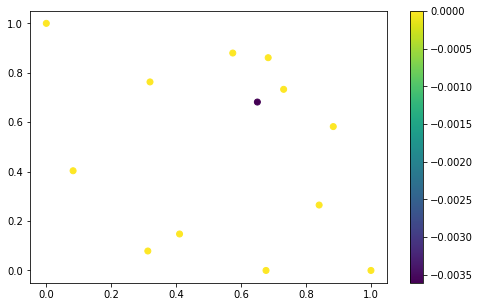

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar();

In [8]:
import itertools as it

In [9]:
X_grid = np.fromiter(it.chain(*it.product(np.linspace(0, 1, 100), repeat=2)), dtype=float).reshape(-1,2)

In [10]:
def upper_confidance_bound(i_param, o_param):
    gpr = GaussianProcessRegressor()
    gpr.fit(i_param, o_param)
    mean, std = gpr.predict(X_grid, return_std = True)
    ucb = mean + 1.2 * std
    return ucb


In [11]:
def get_next(upper_conf):
    idx_max = np.argmax(upper_conf)
    next_query = X_grid[idx_max]
    return next_query

In [12]:
ucb = upper_confidance_bound(X,Y)

In [13]:
next = get_next(upper_conf=ucb)
next

array([0.        , 0.09090909])